In [46]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
train = pd.read_csv('../data/sales_history.csv')
item_cat = pd.read_csv('../data/item_categories.csv')
cat_name = pd.read_csv('../data/category_names.csv')
test = pd.read_csv('../data/test.csv')
submit = pd.read_csv('../data/sample_submission.csv')

train.columns = 'date shop_id item_id price item_cnt_day'.split()
test.columns = 'idx item_id shop_id'.split()


In [48]:
train.head()

,date,shop_id,item_id,price,item_cnt_day
0,2018-01-01,9,1000001,420,1.0
1,2018-01-01,6,1000001,420,1.0
2,2018-01-01,10,1000001,420,1.0
3,2018-01-01,0,1000017,250,1.0
4,2018-01-01,1,1000017,250,1.0


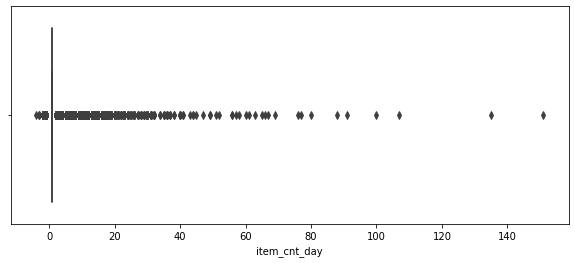

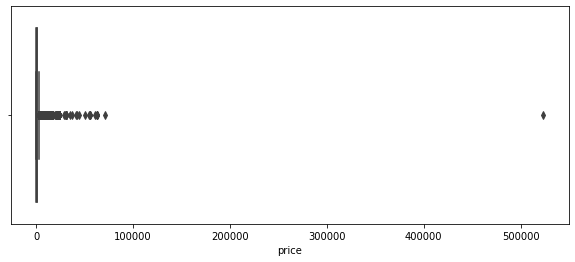

In [49]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
sns.boxplot(x=train.price)


In [50]:
train[train.item_cnt_day> 120]

,date,shop_id,item_id,price,item_cnt_day
516829,2018-10-06,9,1100302,1020,135.0
946871,2019-06-20,9,1100336,130,151.0


In [56]:
train[train.item_cnt_day < 0]

,date,shop_id,item_id,price,item_cnt_day


In [53]:
train = train[train.price <200000]
train = train[train.item_cnt_day < 120]
train.price.max()

71400

In [55]:
train.loc[train.item_cnt_day < 0 ,'item_cnt_day'] = 0


In [ ]:
cat

In [ ]:
cat_name

In [ ]:
item_cat

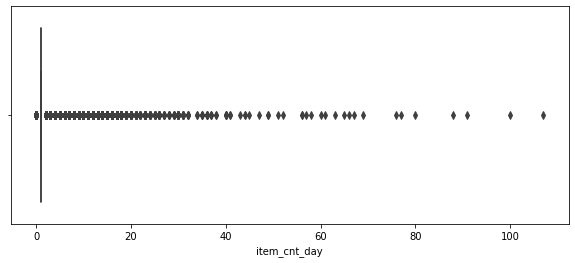

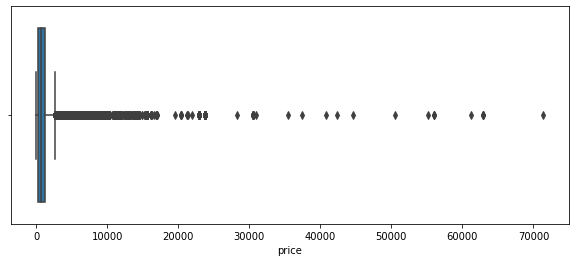

In [57]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
sns.boxplot(x=train.price)


In [58]:
def add_monthly_idx(x):
    if x >= '2018-01-01' and x < '2018-02-01':
        return 0
    elif x >= '2018-02-01' and x < '2018-03-01':
        return 1
    elif x >= '2018-03-01' and x < '2018-04-01':
        return 2
    elif x >= '2018-04-01' and x < '2018-05-01':
        return 3
    elif x >= '2018-05-01' and x < '2018-06-01':
        return 4
    elif x >= '2018-06-01' and x < '2018-07-01':
        return 5
    elif x >= '2018-07-01' and x < '2018-08-01':
        return 6
    elif x >= '2018-08-01' and x < '2018-09-01':
        return 7
    elif x >= '2018-09-01' and x < '2018-10-01':
        return 8
    elif x >= '2018-10-01' and x < '2018-11-01':
        return 9
    elif x >= '2018-11-01' and x < '2018-12-01':
        return 10
    elif x >= '2018-12-01' and x < '2019-01-01':
        return 11
    elif x >= '2019-01-01' and x < '2019-02-01':
        return 12
    elif x >= '2019-02-01' and x < '2019-03-01':
        return 13
    elif x >= '2019-03-01' and x < '2019-04-01':
        return 14
    elif x >= '2019-04-01' and x < '2019-05-01':
        return 15
    elif x >= '2019-05-01' and x < '2019-06-01':
        return 16
    elif x >= '2019-06-01' and x < '2019-07-01':
        return 17
    elif x >= '2019-07-01' and x < '2019-08-01':
        return 18
    elif x >= '2019-08-01' and x < '2019-09-01':
        return 19
    elif x >= '2019-09-01' and x < '2019-10-01':
        return 20
    elif x >= '2019-10-01' and x < '2019-11-01':
        return 21
    else:
        return 22 


In [59]:
train['month_idx'] = train['date'].apply(add_monthly_idx)


In [60]:
train['month_idx'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [8]:
matrix = []
cols = ['month_idx','shop_id', 'item_id']

for i in range(22):
    sales = train[train.month_idx==i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))

matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
    


In [11]:
matrix.sort_values('shop_id')

,month_idx,shop_id,item_id
194046,2,0,17246
918577,11,0,17942
918576,11,0,17821
918575,11,0,17820
918574,11,0,17784
...,...,...,...
956950,11,17,21506
956951,11,17,21508
956952,11,17,21510
956954,11,17,21513


In [12]:
matrix 

,month_idx,shop_id,item_id
0,0,9,16961
1,0,9,16977
2,0,9,16978
3,0,9,16987
4,0,9,16988
...,...,...,...
1648921,21,12,6249
1648922,21,12,-24731
1648923,21,12,9872
1648924,21,12,23406


In [19]:
monthly_sold = df.groupby(['id','month_idx','shop_id'],as_index=False).agg({'price': 'mean', 'quantity': 'sum'})

In [20]:
test.head()

,id,shop_id
index,,
0,1000001,0
1,1000001,1
2,1000001,2
3,1000001,3
4,1000001,4


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3060 entries, 0 to 3059
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       3060 non-null   int64
 1   shop_id  3060 non-null   int64
dtypes: int64(2)
memory usage: 151.7 KB


In [22]:
monthly_sold.head()

,id,month_idx,shop_id,price,quantity
0,1000001,0,0,420.0,6.0
1,1000001,0,1,325.0,2.0
2,1000001,0,2,420.0,1.0
3,1000001,0,3,420.0,2.0
4,1000001,0,5,380.0,2.0


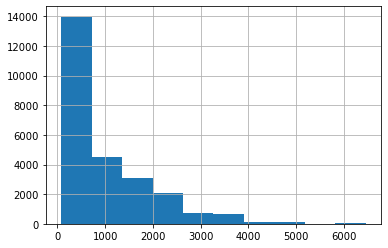

In [14]:
monthly_sold['price'].hist()

In [17]:
month_cnt('2018-02-01')

1

In [13]:
df.index

Int64Index([      0,       1,       2,     364,     365,     366,     367,
                368,     369,     370,
            ...
            1119522, 1119523, 1119524, 1119525, 1119541, 1119551, 1119553,
            1119562, 1119563, 1119568],
           dtype='int64', length=48221)

In [21]:
df.head()

,shop_id,id,price,quantity
日付,,,,
2018-01-01,9,1000001,420,1.0
2018-01-01,6,1000001,420,1.0
2018-01-01,10,1000001,420,1.0
2018-01-01,0,1200007,250,1.0
2018-01-01,15,1200007,130,1.0
